<Axes: >

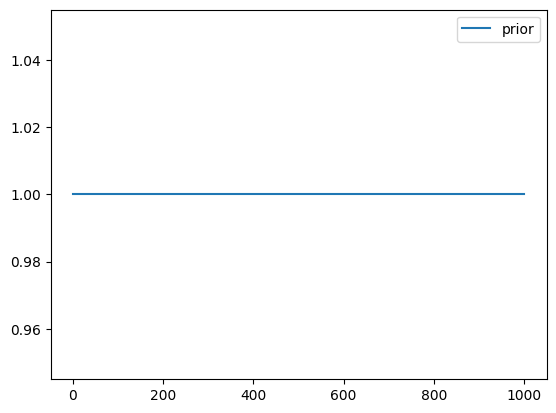

In [1]:
# Problem - a railroad numbers its carts in order 1..N. One day you see a cart with the number 60. Estimate how many locomotives the railroad has.

import numpy as np
from empiricaldist import Pmf

hypos = np.arange(1, 1001)
prior = Pmf(1, hypos)

def update_train(pmf, data):
    hypos = pmf.qs
    likelihood = 1/hypos
    impossible = (data>hypos)
    likelihood[impossible] = 0
    pmf *= likelihood
    pmf.normalize()

data = 60
prior.plot(legend=True, label='prior')



array([ 69., 869.])

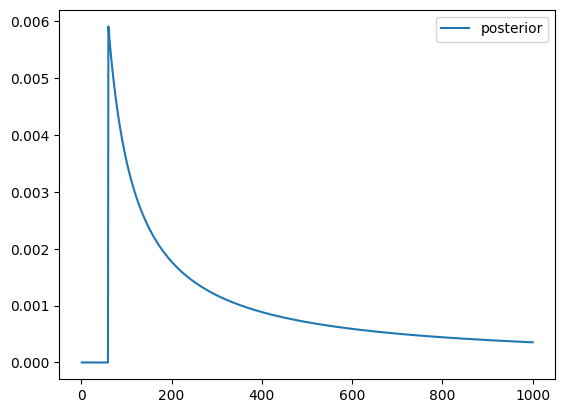

In [3]:
posterior = prior.copy()
update_train(posterior, data)
posterior.plot(legend=True, label='posterior')
posterior.quantile([0.05, 0.95])

<Axes: >

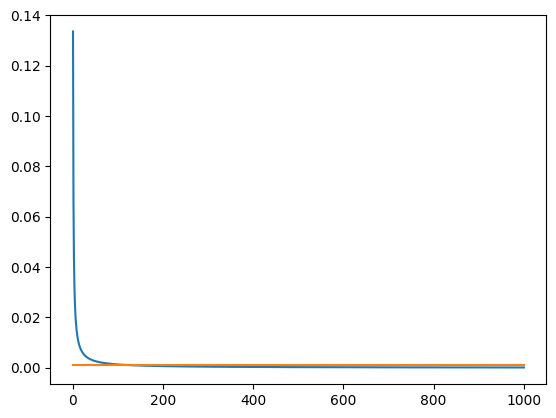

In [4]:
# using power law prior

alpha = 1.0
ps = hypos ** (-alpha)
power = Pmf(ps, hypos, name = "power law")
power.normalize()
power.plot()

hypos = np.arange(1, 1001)
uniform = Pmf(1, hypos, name = 'uniform')
uniform.normalize()
uniform.plot()


<Axes: >

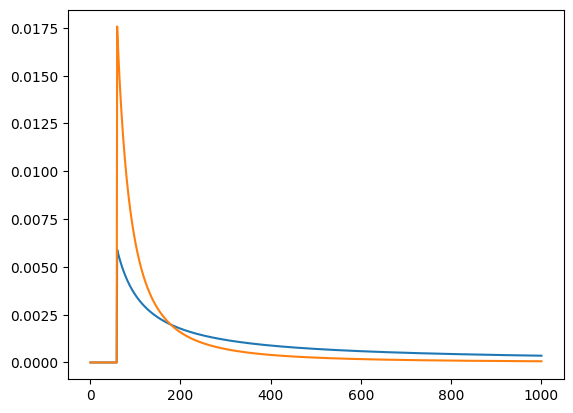

In [5]:
dataset = [60]
update_train(uniform,   )
update_train(power, dataset)

uniform.plot()
power.plot()

In [8]:
uniform.mean() # 333.41
power.mean() # 178.5

178.5473531797161

In [9]:
power.prob_le(100)
uniform.prob_le(100)

0.18572790956075338

In [18]:
def quantile(pmf, prob):
    total = 0
    for q,p in pmf.items():
        total += p
        if total >= prob:
            return q
    return np.nan

quantile(power, 0.5)
power.quantile([0.05, 0.95])
power.credible_interval(0)

array([112., 112.])